In [1]:
# Initialize Otter
import otter
grader = otter.Notebook("hw4_bv_regular_hp.ipynb")

# Homework 4 Bias & Variance

In [2]:
from tqdm import tqdm
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.linear_model import LinearRegression

## Question 1a: Repeated Samples
Statisticians are generally interested in learning the implications for a "population" based on a single dataset ("sample").
Suppose we know how the ground truth (population) model $y=f(x) = 10 + 2*sin(x) + 1.5 x$ looks like. Generate
some standard normally distributed data. (And sample x to be uniform on the interval [0, 9])
Plot your data with both the datapoints (scatter) and the ground truth function (lineplot).
Create two datasets; i.e. resample x & y for the task. Each of these datasets represents a single survey from which a
statistician (you) tries to learn the ground truth model from.

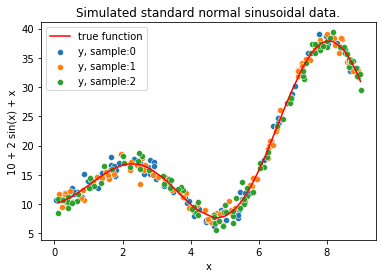

In [3]:
np.random.seed(42)  # do not change this line

n = 100  # do not change this line
f = lambda x: 10 * 1 + 2 * np.sin(x) * x + 1.5 * x  # Notice: theta = [10, 2, 1.5]




# for i in range(3):
#     x_ = np.random.uniform(0, 9, n)
# #     print(x_)
#     y_obs = np.random.normal(0, 1, n)
# #     plt.scatter(x_, y_)
# #     plt.title("test")
# #     plt.bar(y_, x_, width=0.5, color="blue", align='center')

# #     plt.show()

# #         ...
#     sns.scatterplot(x=x_, y=y_obs, label=f'y, sample:{i}')

# ax = sns.lineplot(x=x_, y=f(x_), color='red', label='true function')
# ax.set(xlabel='x', ylabel='10 + 2 sin(x) + x', title='Simulated standard normal sinusoidal data.')
# plt.show()







for i in range(3):
    x_ = np.random.uniform(0, 9, n)
    e = np.random.normal(0, 1, n)
    y_obs = f(x_) + e


    ...
    sns.scatterplot(x=x_, y=y_obs, label=f'y, sample:{i}')

ax = sns.lineplot(x=x_, y=f(x_), color='red', label='true function')
ax.set(xlabel='x', ylabel='10 + 2 sin(x) + x', title='Simulated standard normal sinusoidal data.')
plt.show()

## Question: 1b: Linearity

Explain why this can be modeled by a linear model by choosing one or multiple appropriate answers:
1. Because we have a linear relationship between the data and the model.
2. Because we have a linear combination of the columns.
3. Because the data is normally distributed.
4. Because the data is normally distributed and the model is linear.
5. Because we build the model as a scale and add the columns of the design matrix.

In [6]:
idx = [2]

## Question 1c: Estimate OLS on resampled datasets
Now, using `sklearn.linear_model.LinearRegression` predict y given the known function. Do this
repeatedly on 100 sampled datasets (resampling both x & e). Make n, the sample size a parameter.
 Play around with n and interpret what you see. Collect all the estimated coefficients and
 intercepts (`coef_` & `intercept_` attributes of the fitted model object)

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:05<00:00, 17.41it/s]


<AxesSubplot:>

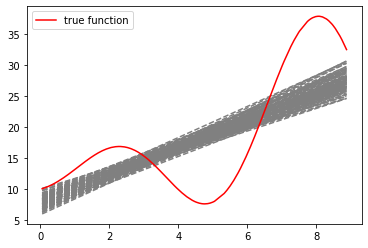

In [7]:
np.random.seed(42)

# create "test" data for plotting the curves
x_ = np.random.uniform(0, 9, 200)
X_ = pd.DataFrame(x_, columns=['x'])
#large X is the design matrix

#Other than that I would like to highlight that there
#is a distinction between x and X, where the latter is the design matrix of the observations x,
#much like when you have a variable x and also take its x2 such that the resulting design matrix would be X = [x, x2].

n = 100
reps = 100

f = lambda x: 10 + 2 * np.sin(x) * x + 1.5 * x  # Notice: theta = [10, 2, 1.5]

regs = []  # List of fitted model objects
for _ in tqdm(range(reps)):
    # generate the data (resample it)
    x = np.random.uniform(0, 10, n)
    e = np.random.normal(0, 1, n)
    y = pd.Series(f(x) + e)

    # Build the model
    X = pd.DataFrame(x, columns=['x'])
    reg = LinearRegression()
    reg.fit(X, y)

    regs.append(reg)

    sns.lineplot(
        x=x_,
        y=reg.predict(X_),
        linestyle='--', color='grey'
    )

sns.lineplot(x=x_, y=f(x_), color='red', label='true function')

In [9]:
grader.check("q1c")

q1c results:
    q1c - 1 result:
        Trying:
            for reg in regs:
                isinstance(reg, LinearRegression)
        Expecting nothing
        **********************************************************************
        Line 1, in q1c 0
        Failed example:
            for reg in regs:
                isinstance(reg, LinearRegression)
        Expected nothing
        Got:
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True

# Question 1d: Distribution of coefficients
From the previous exercise, plot the regression's  coefficints distributions across repetitions.
 What do you observe, when you increase n? Consider how the ground truth noise propagates into the coefficients:  $\hat{\theta} = (X'X)^{-1} X'y = (X'X)^{-1} X'(X \theta_{true} +e) = \theta_{true} + (X'X)^{-1} X'e $ with $e \sim N(0, I)$ (with I being the identity matrix).

(array([ 2.,  2.,  1.,  5.,  2.,  9.,  2., 16., 11.,  9.,  8.,  8.,  5.,
         5.,  6.,  4.,  0.,  3.,  1.,  1.]),
 array([1.6789327 , 1.73323548, 1.78753825, 1.84184103, 1.8961438 ,
        1.95044658, 2.00474935, 2.05905213, 2.1133549 , 2.16765768,
        2.22196045, 2.27626323, 2.330566  , 2.38486878, 2.43917155,
        2.49347433, 2.5477771 , 2.60207988, 2.65638265, 2.71068543,
        2.7649882 ]),
 <BarContainer object of 20 artists>)

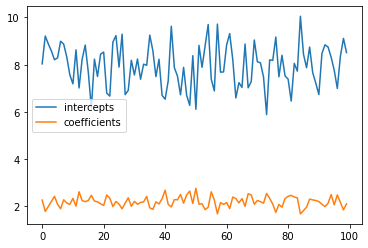

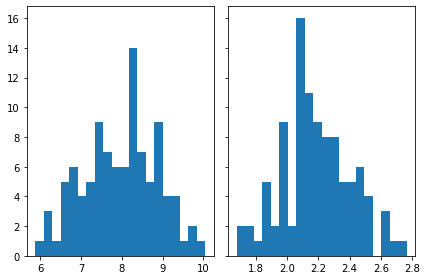

In [10]:
intercepts = pd.Series([reg.intercept_ for reg in regs])
coef = pd.DataFrame([reg.coef_ for reg in regs])

# plot the coefficients:
plt.plot(intercepts, label='intercepts')
plt.plot(coef, label='coefficients')
plt.legend()

n_bins = 20
fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)

axs[0].hist(intercepts, bins=n_bins)
axs[1].hist(coef, bins=n_bins)

(array([ 1.,  3.,  1.,  5.,  6.,  4.,  5.,  9.,  7.,  6.,  6., 14.,  7.,
         5.,  9.,  4.,  4.,  1.,  2.,  1.]),
 array([ 5.88632738,  6.09460365,  6.30287991,  6.51115618,  6.71943245,
         6.92770872,  7.13598498,  7.34426125,  7.55253752,  7.76081378,
         7.96909005,  8.17736632,  8.38564258,  8.59391885,  8.80219512,
         9.01047138,  9.21874765,  9.42702392,  9.63530018,  9.84357645,
        10.05185272]),
 <BarContainer object of 20 artists>)

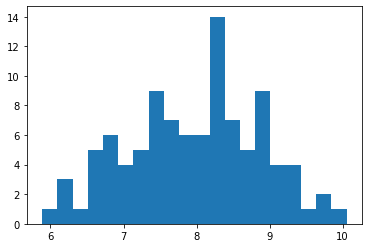

In [11]:
# plot the intercepts
n_bins = 20
fig, axs = plt.subplots(1)
axs.hist(intercepts, bins=n_bins)

In [12]:
df = pd.concat([intercepts, coef], axis=1)
df.columns = ['Intercept', 'x', 'sin(x) x']
df.cov()

ValueError: Length mismatch: Expected axis has 2 elements, new values have 3 elements

In [ ]:
# Choose a/multiple appropriate answer(s):
#
# The coefficients are marginally normally distributed.
# The coefficients are multivariate normally distributed.
# The coefficients are standard normally distributed.
# The coefficients do not follow a particular distribution.

idx = [1]
#2 maybe, multivariate distribution: 3D
#3 wrong: mean is not 0
#4 wrong

In [24]:
# Choose a/multiple appropriate answer(s):
#
# 1. With increasing n, the coefficients’ distributions are getting wider
# 2. With increasing n, the coefficients’ distributions are getting narrower

idx2 = 2

In [25]:
grader.check("q1d")

q1d results: All test cases passed!

## Question 1e: Wrong expectations.
Consider, that $E(\hat{\theta}) = E((X'X)^{-1}X'y) = E((X'X)^{-1}X'(X\theta + e)) = E(\theta) + E(e) =  \mathbb{\theta}$ holds only, if we know the true underlying function (in our case $f(x) = 10 + 2 \sin(x) x + 1.5 x$). What happens if we choose the wrong model?

Keep in mind: $E((X'X)^{-1}X'(X_{true}\theta + e)) = E((X'X)^{-1}X'(X_{true}\theta) + E((X'X)^{-1}X'e) $


choose a/multiple appropriate answer(s):
1. The model bias incerases.
2. The model bias decreases.
3. The model variance increases.
4. The model variance decreases.
5. E((X'X)^{-1}X'e) = 0 given e is normally distributed.
6. E((X'X)^{-1}X'e) is a non-trivial, non-zero scaling of the error.
7. E((X'X)^{-1}X'(X_{true}\theta) = E(\theta) = \theta

In [26]:
idx = ...
# answer depends on the type of wrong model
#higer grade model: variance increases, bias is already 0
#not powerful enough -> bias increases, too powerful: variance increases
#bias never decreases, if model is wrong

---


## Question 2a Regularization
Do you remember the simulated Dataset from the bias & variance lab with the increasing powers of
polynoms we tried to fit the data? Let's make ourselves a new related one:
$y=f(x) = 3*sin(9x) + cos(14x)$
Let us formulate a polynomial model; say `ORDER=20`.




In [27]:
def rmse(y_hat, y):
    return np.sqrt(np.mean((y - y_hat) ** 2))

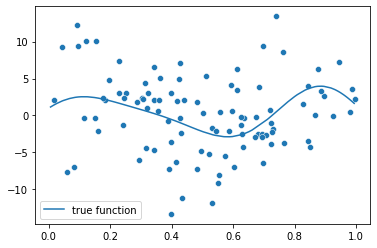

In [28]:
import warnings

warnings.filterwarnings('ignore')
np.random.seed(123)
N = 100
ORDER = 20
noise = 5
x = np.random.uniform(0, 1, N)

# generate the data (resample it)
e = np.random.normal(0, noise, N)
X = pd.DataFrame({'x' + str(p): x ** p for p in range(1, ORDER + 1)})

f = lambda x: 3 * np.sin(x * 9) + 1 * np.cos(x * 14)
y = pd.Series(f(x) + e)
parameters = ['x' + str(p) for p in range(1, ORDER + 1)]

# for plotting purposes:
x_ = np.random.uniform(0, 1, 100)
f_ = f(x_)

sns.scatterplot(x, y)
sns.lineplot(x_, f_, label='true function')
plt.show()


In [29]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [30]:
# choose which class to overwrite with it's sklearn variant.
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

Now let us check the fit of these models on our synthetic data. You may play aroiund with the alpha parameter to see how it affects the fit. Let us start with a small value of alpha

In [31]:
# simple model
reg = LinearRegression(fit_intercept=True)
reg.fit(X, y)

reg_coef = pd.Series(reg.coef_, index=parameters)

In [32]:
print(f'Training rmse: {rmse(reg.predict(X_train), y_train)},'
      f'Test rmse: {rmse(reg.predict(X_test), y_test)}')

Training rmse: 4.4279708440623,Test rmse: 4.24285831616334


In [33]:
# Lasso
lasso = Lasso(alpha=0.01, fit_intercept=True)
lasso.fit(X, y)

lasso_coef = pd.Series(lasso.coef_, index=parameters)

In [34]:
print(f'Training rmse: {rmse(lasso.predict(X_train), y_train)},'
      f'Test rmse: {rmse(lasso.predict(X_test), y_test)}')

Training rmse: 4.875851587930585,Test rmse: 4.979067461815677


In [35]:
# Ridge
ridge = Ridge(alpha=0.01, fit_intercept=True)
ridge.fit(X, y)

ridge_coef = pd.Series(ridge.coef_, index=parameters)

In [36]:
print(f'Training rmse: {rmse(ridge.predict(X_train), y_train)},'
      f'Test rmse: {rmse(ridge.predict(X_test), y_test)}')

Training rmse: 4.830778084720358,Test rmse: 4.987150566860925


Below we can plot all three models' coefficients to compare their estimates of the effects. What do you notice?

           linear      lasso      ridge
x1   9.888926e+04 -13.175505 -10.903666
x2  -4.866895e+06   0.000000 -15.778707
x3   1.268523e+08   0.000000   9.968367
x4  -2.041798e+09  16.248140  18.275548
x5   2.209998e+10   0.000000  14.221737
x6  -1.695890e+11   0.000000   6.469568
x7   9.551058e+11   0.000000  -0.437898
x8  -4.038578e+12  -0.000000  -4.999997
x9   1.300171e+13  -0.000000  -7.196899
x10 -3.207536e+13  -0.000000  -7.553868
x11  6.055554e+13  -0.000000  -6.693741
x12 -8.647924e+13  -0.000000  -5.158257
x13  9.072908e+13  -0.000000  -3.357907
x14 -6.508438e+13  -0.000000  -1.576082
x15  2.489321e+13  -0.000000   0.008078
x16  4.309855e+12  -0.000000   1.293806
x17 -1.200483e+13  -0.000000   2.235849
x18  7.283641e+12  -0.000000   2.826287
x19 -2.166652e+12  -2.205679   3.080943
x20  2.703269e+11  -2.824373   3.029621


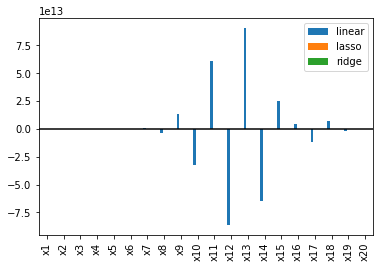

In [37]:
coef_dict = pd.DataFrame([reg_coef, lasso_coef, ridge_coef], index=['linear', 'lasso', 'ridge']).T
print(coef_dict)

ax = coef_dict.plot.bar(rot=90)
ax.axhline(0, color='black')
plt.show()

Let's plot only lasso and ridge coefficients.

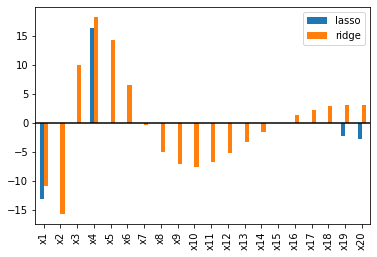

In [38]:
ax = coef_dict[['lasso', 'ridge']].plot.bar(rot=90)
ax.axhline(0, color='black')
plt.show()

Choose a/multiple appropriate answer(s):
1. The coefficients of our polynomial linear model are excessive.
2. The Ridge model is sparse
3. The Lasso model is sparse
4. The Lasso model deselected some powers of the polynomial entirely.
5. The Ridge model deselected some powers of the polynomial entirely.
6. The Ridge model has far more reasonable coefficients at little cost in the performance.
7. The Lasso model has far more reasonable coefficients at little cost in the performance.

In [39]:
idx = [1,3,4,7]
# 1. yeah, the formula posses only 3 parameters and the model has much more (i suppose, didnt check it actually)
# 2. no
# 3. yeah
# 4. yeah -> since its sparse
# 5. no
#### q's 6 and 7 actually depends on what you mean with 'reasonable'...
# 6. no, cus its not sparse
# 7. yeah, ridge and lasso performances are almost the same, but lasso is sparce, so the coefficients are more 'reasonable' in this sense.

In [40]:
grader.check("q2a")

q2a results: All test cases passed!

## Question 2b Regularization vs. overfitting
Plot the predicted lines for each of these models alongside the true function and observed data. What do you see when you play around with the `alpha` parameters?

<AxesSubplot:>

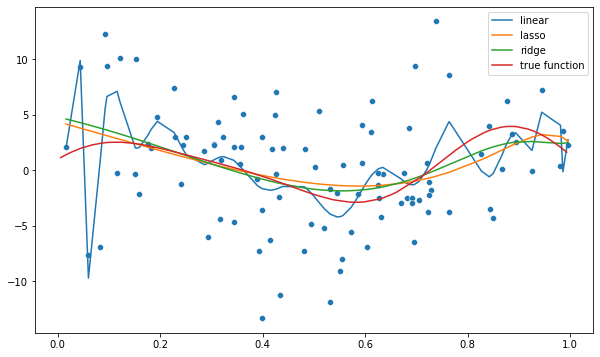

In [41]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=x, y=reg.predict(X), label='linear')
sns.lineplot(x=x, y=lasso.predict(X), label='lasso')
sns.lineplot(x=x, y=ridge.predict(X), label='ridge')

sns.lineplot(x_, f_, label='true function')
sns.scatterplot(x, y)

_Type your answer here, replacing this text._

In [ ]:
idx = ...

In [ ]:
grader.check("q2b")

---

# Question 3: Hyperparameter Tuning:
In this exercise we will try to optimize a support vector machine classifier's hyperparameters 'C' and 'gamma' on some random dataset. We will use GridSearch, RandomSearch and BayesianOptimization.
We will use scikit-learn's hyperparameter optimizers for this, so make sure to install it via `pip install scikit-optimize. Remember, that hyperparameters are optimized on the validation set.
We will give all of them an equal amount of 100 trials. In this example, do not care to much about what a support vector machine classifier does, nor what the parameters actually do. Notice, that the execution of the code below can take a while.

In [42]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
import seaborn as sns

np.random.seed(42)

In [44]:
# automatic svm hyperparameter tuning using skopt for the ionosphere dataset
from pandas import read_csv
from sklearn.model_selection import ParameterGrid
from sklearn.svm import SVC

from skopt import BayesSearchCV  # pip install scikit-optimize

# # load dataset
url = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/ionosphere.csv'
dataframe = read_csv(url, header=None)
# split into input and output elements
data = dataframe.values
X, y = data[:, :-1], data[:, -1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(X.shape, y.shape)

(351, 34) (351,)


## Question 3a: HP & CV:

Before we delve into the actual search, why do we care about the hyperparameters & hyperparameter optimizers?
1. Hyperparameters are design decisions, that influence the performance of a model.
2. Hyperparameter optimizer are giving us a formalized way to reproducibly and efficiently find good models that reduce the training error.
3. Manual tuning is the only way to express expert knowledge about the model's hyperparameters.
4. The best hyperparameters are the ones that minimize the validation error.

How does Cross validation help us in finding good performances?  

5. Cross validation is a way to evaluate the performance of a model without actually training it.
6. Cross validation allows us evaluate the generalization performance of a model by holding out data from the training process.
7. Cross validation merges the training and validation data, so we can evaluate the performance of a model on the unseen data.
8. Averaging the validation performance on multiple folds aims at reducing the issue of having only one dataset rather than a set of datasets.

In [60]:
idx = [1, 2, 5, 6, 7, 8]
# 4 is wrong, its just overfitted on the validation data.
# 7 yeah. see slide 12 of pdf 9.
# 8 what a nice question, i really like it.

## Grid Search
Let's start out with Grid Search. Using ParameterGrid, we can create a grid of parameters to from their one dimensional ranges and execute each of the pairs of configurations.

In [45]:
np.random.seed(42)

search_space = {'C': np.linspace(0.01, 10., 10),
                'gamma': np.linspace(0.01, 10., 10)}  # a hundred values for C and gamma

print(f'Search space: {search_space} \n')

print(f'Optimizing using gridsearch...')
cv_scores = []
configs = []
for config in ParameterGrid(search_space):
    svc = SVC(kernel='rbf', degree=1, **config)
    svc.fit(X_train, y_train)

    scores = cross_val_score(svc, X_train, y_train, cv=10)
    print(f'C: {config["C"]:.3f}, Gamma: {config["gamma"]:.3f}, Score: {scores.mean():.3f}')

    cv_scores.append(scores.mean())
    configs.append(config)


Search space: {'C': array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ]), 'gamma': array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ])} 

Optimizing using gridsearch...
C: 0.010, Gamma: 0.010, Score: 0.650
C: 0.010, Gamma: 1.120, Score: 0.650
C: 0.010, Gamma: 2.230, Score: 0.650
C: 0.010, Gamma: 3.340, Score: 0.650
C: 0.010, Gamma: 4.450, Score: 0.650
C: 0.010, Gamma: 5.560, Score: 0.650
C: 0.010, Gamma: 6.670, Score: 0.650
C: 0.010, Gamma: 7.780, Score: 0.650
C: 0.010, Gamma: 8.890, Score: 0.650
C: 0.010, Gamma: 10.000, Score: 0.650
C: 1.120, Gamma: 0.010, Score: 0.879
C: 1.120, Gamma: 1.120, Score: 0.900
C: 1.120, Gamma: 2.230, Score: 0.886
C: 1.120, Gamma: 3.340, Score: 0.675
C: 1.120, Gamma: 4.450, Score: 0.671
C: 1.120, Gamma: 5.560, Score: 0.671
C: 1.120, Gamma: 6.670, Score: 0.668
C: 1.120, Gamma: 7.780, Score: 0.664
C: 1.120, Gamma: 8.890, Score: 0.668
C: 1.120, Gamma: 10.000, Score: 0.668
C: 2.230, Gamma: 0.010, 

Let's find the best configuration.
And check how well the configurations performed (after all we can easily plot 2d data).


<AxesSubplot:xlabel='C', ylabel='gamma'>

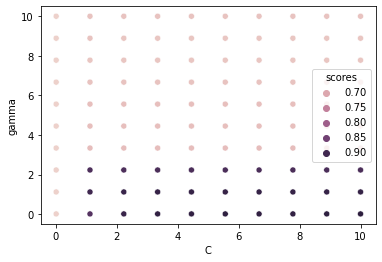

In [46]:
df = pd.DataFrame(configs, columns=['C', 'gamma'])
df['scores'] = pd.Series(cv_scores)

sns.scatterplot(x='C', y='gamma', hue='scores', data=df)

In [47]:
df.iloc[df.scores.argmax()] # Best performing configuration

C         10.000000
gamma      0.010000
scores     0.921429
Name: 90, dtype: float64

Just a penny for your thoughts: what metric are we even using here? Hint check `svc.score`. Would it look the same if we had [`f1 score`](https://scikit-learn.org/stable/modules/cross_validation.html#cross-validation)?

What would have happend, if we had started not at 0.01, 0.01 but at 10, 10 and progressed in the same iterative but decreasing manner and stopped earlier? i.e. (gamma = 10, c = 10), (gamma = 10, c = 9), ...

## Random Search

In [48]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform

distributions = {
    'C': uniform(loc=1e-6, scale=10.),
    'gamma': uniform(loc=1e-6, scale=10.),
}

rsearch = RandomizedSearchCV(estimator=SVC(kernel='rbf', degree=1),
                             param_distributions=distributions, n_jobs=-1, n_iter=100, cv=10)

rsearch.fit(X_train, y_train)

RandomizedSearchCV(cv=10, estimator=SVC(degree=1), n_iter=100, n_jobs=-1,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002437E08E3A0>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x000002437E32B9D0>})

In [49]:
rsearch.best_params_, rsearch.best_score_

({'C': 1.3637157558676976, 'gamma': 0.1454476566788193}, 0.9428571428571427)

In [50]:
rdf = pd.DataFrame(rsearch.cv_results_['params'])
rdf['scores'] = -pd.Series(rsearch.cv_results_['mean_test_score'])

<AxesSubplot:xlabel='C', ylabel='gamma'>

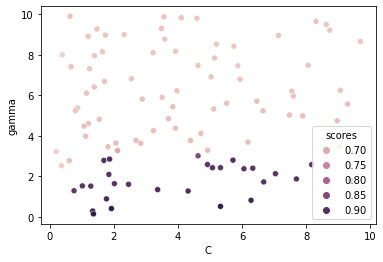

In [51]:
sns.scatterplot(x=rdf['C'], y=rdf['gamma'], hue=-rdf['scores'])
# sns.lineplot(x=rdf['C'], y=rdf['gamma'], sort=False)

---

## Bayesian Optimization

In [53]:
# define search space
search_space = {
    'C': (1e-6, 10.0, 'uniform'),
    'gamma': (1e-6, 10.0, 'uniform'),
}

bsearch = BayesSearchCV(estimator=SVC(kernel='rbf', degree=1), search_spaces=search_space,
                        n_jobs=-1, n_iter=100, cv=10)
bsearch.fit(X_train, y_train)

print(bsearch.best_params_)

OrderedDict([('C', 10.0), ('gamma', 0.3702833058511551)])


In [54]:
bdf = pd.DataFrame(bsearch.cv_results_['params'])

In [55]:
bsearch._optim_results[0].func_vals # cv scores.

array([-0.67142857, -0.675     , -0.66428571, -0.675     , -0.66428571,
       -0.67142857, -0.66428571, -0.66428571, -0.66785714, -0.84285714,
       -0.88928571, -0.88928571, -0.88928571, -0.89285714, -0.93214286,
       -0.93928571, -0.65      , -0.91071429, -0.90357143, -0.65      ,
       -0.65      , -0.89285714, -0.89285714, -0.89285714, -0.89285714,
       -0.89285714, -0.88928571, -0.94285714, -0.90357143, -0.90714286,
       -0.94285714, -0.88571429, -0.925     , -0.88928571, -0.90714286,
       -0.9       , -0.65      , -0.91071429, -0.66785714, -0.925     ,
       -0.65      , -0.66785714, -0.93928571, -0.92142857, -0.65      ,
       -0.93928571, -0.93928571, -0.88928571, -0.65      , -0.93214286,
       -0.91071429, -0.79642857, -0.88571429, -0.92142857, -0.65      ,
       -0.88928571, -0.925     , -0.90357143, -0.93571429, -0.89285714,
       -0.88571429, -0.88928571, -0.93928571, -0.67142857, -0.66428571,
       -0.89285714, -0.66785714, -0.65      , -0.88928571, -0.67

<AxesSubplot:xlabel='C', ylabel='gamma'>

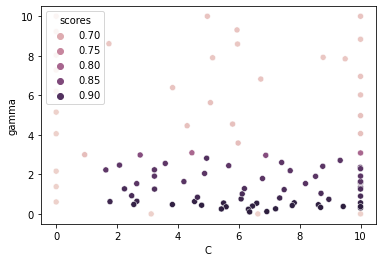

In [56]:
trace = np.array(bsearch._optim_results[0].x_iters)
trace = pd.DataFrame(trace, columns=['C', 'gamma'])
trace['scores'] = -pd.Series(bsearch._optim_results[0].func_vals)
sns.scatterplot(x='C', y='gamma', hue='scores', data=trace)
# sns.lineplot(x='C', y='gamma', sort=False, data=trace)

## Question 2b: Hyperparameter optimization search strategies
State the (set of) answers that are true:

1. Random search is the best method for hyperparameter search, as it covers the space of all possible hyperparameter combinations best.
2. Bayesian optimization is the most sample efficient method presented here.
3. Grid search is covering the space of all possible hyperparameter combinations best.
4. Random search is covering the space of all possible hyperparameter combinations best.
5. Random search spends an area-proportional amount of time in each part of the search space and continues to do so regardless of the observed performances.
6. Bayesian optimization updates its belief about the cost surface and the optimum as new performances become available.
7. Bayesian optimization is an easily parallelizable method.
8. Bayesian optimization leverages the continuity of the performance wrt. to the parameter space.

In [57]:
idx = [2, 3, 6, 8]
# regarding 7 -> this algorithm is sequantial (depends on the previous results) it cant be parallelized
# 8 -> yes?

Completely optional, but you might have noticed that we in fact did fix part of the design decisions. If you like, you can repeat the same experiments from above,
but modeling the kernel choice and the degree. What is conceptually troubling here? Think about the type of hyperparameters that are being optimized and what similarity means here (Notice, that something advanced is happening under the hood here.)

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [61]:
grader.check_all()

q1a results: All test cases passed!

q1b results: All test cases passed!

q1c results:
    q1c - 1 result:
        Trying:
            for reg in regs:
                isinstance(reg, LinearRegression)
        Expecting nothing
        **********************************************************************
        Line 1, in q1c 0
        Failed example:
            for reg in regs:
                isinstance(reg, LinearRegression)
        Expected nothing
        Got:
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True
            True


## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [62]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)